<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 2 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

### Modelo de regla de la mayoría
Las personas se organizan en grupos y cambian sus opiniones según lo que piense la mayoría de éstos.
### Simulacion
...


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def Prob(L, P0, *args): #Esta función es P(t+1), se calcula como aparece en el paper
    if np.sum(args) != 1 or len(args) != L: #Verifica que se cumplan lascondiciones del modelo
        return print('los valores de a_n no suman 1 o no coinciden con L') 
    else:
        total_sum = 0 
        for i in range(1, len(args) + 1):
            b = args[i - 1]
            sum_i = 0
            for j in range(int(np.floor((i / 2) + 1)), i + 1):
                C = (np.math.factorial(i)) / ((np.math.factorial(i - j)) * (np.math.factorial(j)))
                Py = j
                Pn = i - j
                su = b * np.sum(C * P0 ** Py * (1-P0) ** Pn)
                sum_i += su
                total_sum += su
        return sum_i, total_sum

In [3]:
def plotter(nombre, L,*args): #Esta función itera para distintos P(0) iniciales y grafica
    path = './Simulacion/'+ str(nombre)+'/'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'El grupo mas grande es: '+str(L)+'\n')
        file.write( 'Los grupos definidos son:')
        file.write('\n')
        for e in range(len(args)):
            file.write('a_' + str(e) + '= '+str(args[e]))
            file.write('\n')
    P0=np.linspace(0,1,100)
    total_sum_values=[]
    for item in P0: #Itera sobre P0 entre 0 y 1
        try:
            sum_i, total_sum = Prob(L, item, *args)
            total_sum_values.append(total_sum)
        except:
            print('')
            break
    if len(total_sum_values)!=0:
        plt.plot(P0,total_sum_values)
        plt.plot(P0,P0, 'r--')
        plt.xlabel(r'$P_+$ en tiempo t')
        plt.ylabel(r'$P_+$ en tiempo t+1')
        plt.xlim(0, 1)
        plt.ylim(0,1)
        plt.grid(True)
        plt.savefig(path+'L = '+str(L)+'.png')
        plt.show()

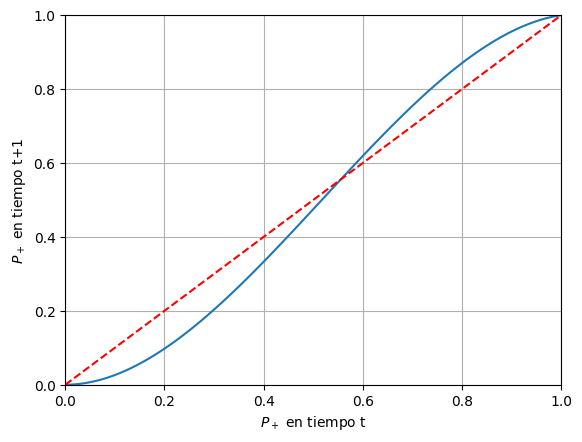

In [8]:
plotter('L=3', 3,0,0.1,0.9)